In [1]:
import geopandas
import pandas
import numpy
import math
import matplotlib.pyplot as plt

['Antigua and Barbuda', 'Aruba', 'Virgin Islands, U.S.', 'Trinidad and Tobago', 'Netherlands Antilles', 'Saint Vincent and the Grenadines', 'Grenada', 'Barbados', 'Saint Lucia', 'Saint Kitts and Nevis', 'Montserrat', 'Jamaica', 'Saint-Martin', 'Haiti', 'Guadeloupe', 'Venezuela', 'Puerto Rico', 'Dominican Republic', 'Anguilla', 'Cayman Islands', 'Turks and Caicos Islands', 'United States', 'Bahamas', 'Martinique', 'Colombia', 'Saint-Barthélemy', 'Cuba', 'Dominica', 'British Virgin Islands']


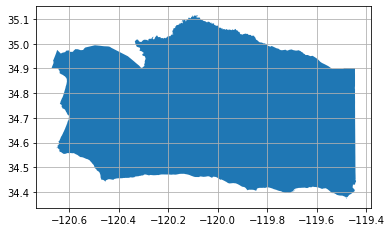

In [2]:
fig, ax = plt.subplots()
ax.grid(True)


caribbean = geopandas.read_file('data/caribbean.gpkg') 
names = list(caribbean['NAME_0'])
print(names)
polygons = caribbean[caribbean['NAME_0'] == 'Trinidad and Tobago']
polygons = caribbean[caribbean['NAME_0'] == names[26]] # 20, 25, 26

#polygons = geopandas.read_file('../data/santa_barbara.gpkg') 
#polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#polygons = polygons[polygons.name =='Brazil']
polygons = geopandas.read_file('data/santa_barbara.gpkg') 

polygons.plot(ax=ax)

In [3]:
geom_type = polygons.iloc[0].geometry.type
if  geom_type == 'Polygon':
    lon = polygons.iloc[0].geometry.exterior.xy[0]
    lat = polygons.iloc[0].geometry.exterior.xy[1]
elif geom_type == 'MultiPolygon':
    lon = []
    lat = []
    for p in list(polygons.iloc[0].geometry):
        lon += p.exterior.xy[0]
        lat += p.exterior.xy[1]
        
lon = numpy.array(lon)
lat = numpy.array(lat)

# We convert to ECEF vectors
x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
z = numpy.sin(lat/360*math.pi*2)

In [8]:
len(x)
x[5117]

-0.40618828376270366

In [5]:
df = pandas.DataFrame({'x': x, 'y': y, 'z': z})
df.to_csv('data/santa_barbara.csv', index=None, header=None)